In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Dataset/WineQT.csv")

In [4]:
print("Dataset Preview:")
print(data.head())

Dataset Preview:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8       

In [6]:
numeric_data = data.select_dtypes(include=[np.number]).dropna()

In [7]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

In [8]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

In [9]:
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

In [10]:
explained_variance = pca.explained_variance_ratio_

In [11]:
print("\nExplained Variance Ratio:", explained_variance)
print("\nPrincipal Components (first 5 rows):")
print(pca_df.head())


Explained Variance Ratio: [0.25192323 0.17625364]

Principal Components (first 5 rows):
        PC1       PC2
0 -1.215133 -1.794555
1 -0.467435 -2.477990
2 -0.401695 -1.871949
3  2.645247  0.100493
4 -1.216916 -1.792910


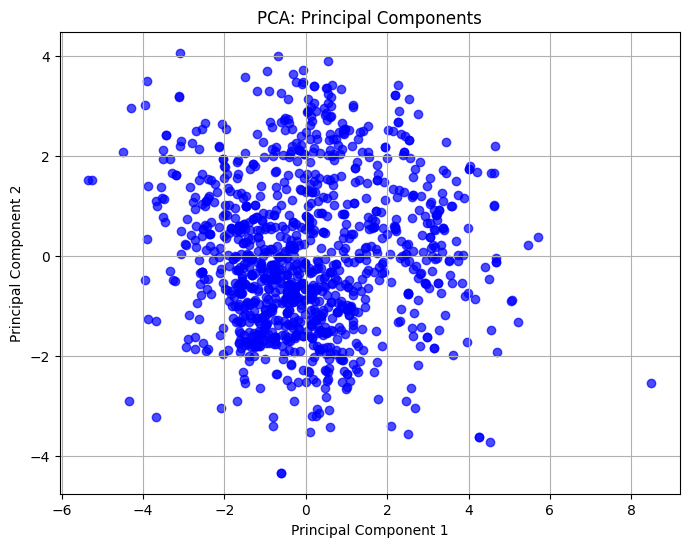

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue', alpha=0.7)
plt.title("PCA: Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()